# **Credit Card Fraud Detection**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data from Google Drive

In [2]:
# mount drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load data from drive
df=pd.read_csv('drive/My Drive/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [6]:
# distribution of variables
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# distribution of fraud and non-fraud transaction in the data
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


In [8]:
# number of values in each class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

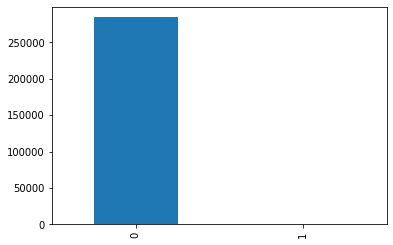

In [9]:
# plot shoing the distribution
df['Class'].value_counts().plot(kind='bar')

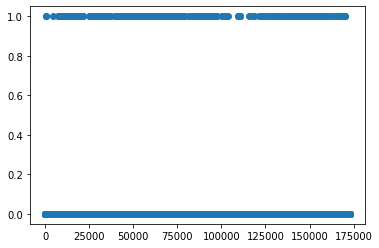

In [10]:
# scatter plot of time and class
plt.scatter(df['Time'], df['Class'])
plt.show()

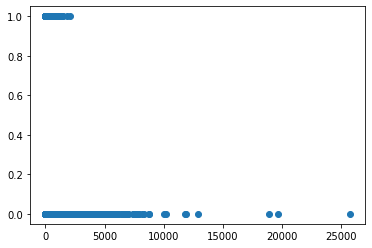

In [11]:
# scatter plot of amount and class
plt.scatter(df['Amount'], df['Class'])
plt.show()

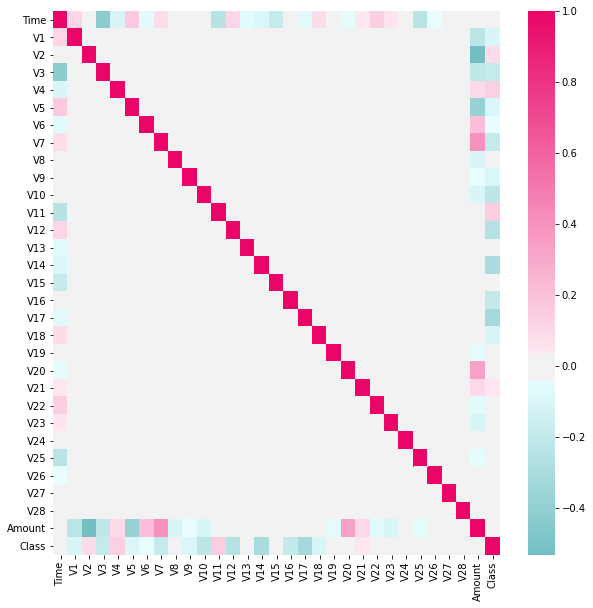

In [12]:
# heatmap showing correlation between variables
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=df.corr(), center=0.0, cmap=mycmap)

In [13]:
# drop time as it does not have a specific meaning in the analysis and also from the scatter plot and heatmap it does not affect the class
df.drop(columns='Time',inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Splitting Data to Test and Train

In [0]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# divide data into train and test maintaing the class distribution
X = df.drop(['Class'], axis = 1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [15]:
# check if the distribution is uniform
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


## Handling Skewness in the data

In [16]:
# Skewness in each variable
X_train.skew(axis = 0)

V1        -3.314956
V2        -4.744037
V3        -2.285924
V4         0.691400
V5        -2.877451
V6         1.962813
V7         3.325252
V8        -8.689869
V9         0.545185
V10        1.107482
V11        0.363473
V12       -2.328630
V13        0.064537
V14       -1.991184
V15       -0.310135
V16       -1.103301
V17       -3.864212
V18       -0.263168
V19        0.113890
V20       -2.178296
V21        3.558761
V22       -0.224830
V23       -6.405003
V24       -0.550344
V25       -0.419461
V26        0.578140
V27       -0.743545
V28        9.934962
Amount    18.464339
dtype: float64

In [0]:
# list of columns
cols = X_train.columns

In [18]:
from sklearn.preprocessing import PowerTransformer

# power transform the variables to eliminate skewness from the train data
pt = PowerTransformer(copy=False)
X_train = pt.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train,columns=cols)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.687702,-0.410906,1.340853,-0.535376,-0.158568,0.047998,0.046655,0.194627,0.519610,-0.844992,0.365821,1.253679,0.093466,-0.605382,-1.798904,0.328792,-0.677411,0.091354,0.302364,0.307821,0.084485,-0.003745,0.566883,0.007716,-1.615275,1.317653,0.171370,0.583799,0.947209
1,-1.689222,-0.601552,-0.451193,-1.909394,-0.305639,0.023485,0.100674,0.514401,0.889301,-1.047354,0.025000,0.452034,-0.349679,0.286859,-0.256908,1.823284,-1.448387,1.037600,-0.550023,-2.009915,0.054733,0.857166,-0.078661,0.440860,0.277125,0.824740,-2.090911,0.510031,1.077585
2,-1.149351,1.081675,-0.506056,-1.148611,1.444199,-0.217205,-0.888387,-3.091323,0.685837,-1.409289,-1.656431,0.340880,0.330040,-1.578367,-1.255450,0.745791,0.686069,0.132242,-1.152599,-1.729068,4.437504,-2.826511,-3.449780,-1.665558,-0.479489,-0.436747,1.369812,0.582531,1.044909
3,0.791358,-0.358179,0.342831,-0.099205,-0.731132,-0.550441,-0.482563,-0.339151,0.733062,0.136986,0.455729,-2.117097,2.096262,0.970812,-1.349902,0.579259,1.763422,-1.796201,0.900026,0.062924,-0.207341,-0.192957,-0.070985,0.548574,1.063177,-0.548631,-0.040711,0.038545,-0.029545
4,-0.461845,0.686866,0.862753,0.664698,0.090544,-0.621574,0.602844,-0.175412,-0.415029,0.033079,-0.526362,-0.456287,-0.247631,0.338916,1.184020,-0.438487,-0.247423,0.148182,0.502918,0.182442,0.172998,0.625350,-0.237534,0.602729,-0.415921,-0.623910,1.031131,0.706450,-0.482898


In [19]:
X_train.skew(axis=0)

V1       -0.217939
V2        0.339373
V3       -0.079501
V4        0.020596
V5       -1.415987
V6       -2.015624
V7        3.059857
V8        2.372059
V9       -0.049578
V10      -1.323086
V11       0.063151
V12       0.164560
V13       0.006450
V14       0.101325
V15       0.014312
V16       0.165071
V17      -0.789553
V18      -0.060091
V19       0.015258
V20      -0.827071
V21      -2.151135
V22      -0.027414
V23      -0.277897
V24       0.111055
V25       0.079449
V26      -0.024530
V27       3.769495
V28       1.281518
Amount    0.018107
dtype: float64

In [20]:
X_test.skew(axis=0)

V1        -3.175769
V2        -4.267418
V3        -2.101681
V4         0.630847
V5        -1.023943
V6         1.410118
V7         0.127390
V8        -8.021022
V9         0.583047
V10        1.424861
V11        0.335691
V12       -2.127814
V13        0.067211
V14       -2.007104
V15       -0.303293
V16       -1.094117
V17       -3.788236
V18       -0.249760
V19        0.095160
V20       -1.620495
V21        3.698370
V22       -0.178454
V23       -4.292683
V24       -0.558956
V25       -0.404896
V26        0.572367
V27       -2.509384
V28       14.492561
Amount    12.430316
dtype: float64

In [21]:
# transform the test data
X_test = pt.transform(X_test)
X_test = pd.DataFrame(data=X_test,columns=cols)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.244541,4.051384,-0.068870,-1.687073,0.187044,-0.342895,1.998793,-1.663278,5.102592,8.409306,2.255815,-0.924438,-1.426642,-3.300052,1.202420,-1.107798,-2.342859,-0.471230,-0.478309,6.017868,-2.419473,-1.334081,-0.238265,-0.373679,2.046678,-0.133551,3.657020,-1.123907,-0.491684
1,1.285025,0.262725,-0.600329,2.375475,0.205338,-0.218065,0.209224,-0.265821,-0.884660,1.356705,-1.225746,-0.555303,-0.027638,0.258387,-0.629480,0.977555,-1.006457,-0.201571,-2.165322,-0.330761,0.435610,1.254633,-0.023795,-0.009917,0.309887,0.530019,-0.118049,-0.141622,0.146121
2,-0.837750,0.840295,0.858475,1.018379,0.039404,-0.462529,1.654025,-0.471014,-1.482739,0.132699,-0.424135,-0.602638,-0.282398,0.264415,-0.540108,0.542849,-0.839266,-0.634698,-2.046639,-0.530072,0.069934,0.185714,-0.131078,1.246800,0.859571,-0.164791,-0.273286,0.012937,1.148748
3,-1.419180,-1.091305,0.994947,1.846046,0.651617,0.345261,-0.550240,1.069869,-1.366210,0.190773,1.098375,0.068987,-0.641958,1.022305,0.964275,0.382406,0.034145,0.233105,-1.096860,1.224043,0.946936,0.889259,0.672109,-0.581085,-0.779029,0.350623,0.000125,-0.871300,1.332065
4,-0.602273,0.530730,-0.243109,0.031855,1.528670,2.456453,-0.279608,1.538792,-0.431730,-0.552380,-0.740486,-0.060326,-0.126085,0.347487,0.075862,-0.319822,-0.200185,0.236407,1.517901,0.035717,-0.196843,-0.793972,-0.115966,1.861517,-0.044677,-1.011304,0.093630,0.225344,-0.154057


In [22]:
X_test.skew(axis=0)

V1       -0.208921
V2        0.436865
V3       -0.063905
V4       -0.008041
V5       -0.321139
V6       -1.094736
V7        0.004344
V8        2.831912
V9       -0.003008
V10      -0.774353
V11       0.056218
V12       0.161425
V13       0.008778
V14       0.052888
V15       0.011755
V16      -0.021969
V17      -0.719748
V18      -0.051221
V19      -0.004179
V20      -0.496075
V21      -1.486383
V22       0.014873
V23       1.513592
V24       0.111441
V25       0.093085
V26      -0.027086
V27      -0.625579
V28       6.144530
Amount    0.027142
dtype: float64

## Model Building on Plain Dataset

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

### Logistic Regression

In [24]:
#fitting the linear Regression model
lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
#accuracy score of linear regression model
lr.score(X_train,y_train)

0.9992837246319141

In [26]:
# predict churn on test data
y_pred = lr.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71063    16]
 [   42    81]]
Sensitivity: 	0.66
Specificity: 	1.0
AUC:    	 0.97


In [27]:
# accuracy score on test set
lr.score(X_test,y_test)

0.9991854161399961

Tuning Hyperparameters

In [0]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [29]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   38.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [30]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041385,0.005551,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,1.597982,0.061527,0.024952,0.000417,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.983295,0.974828,0.986602,0.985477,0.977237,0.981488,0.004642,1
2,0.036746,0.001004,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,1.783824,0.134607,0.026129,0.002474,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.983245,0.973899,0.986635,0.984781,0.976936,0.981099,0.004857,2
4,0.037516,0.000947,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,1.885677,0.142623,0.025095,0.000185,1,l2,"{'C': 1, 'penalty': 'l2'}",0.983233,0.973730,0.986634,0.984677,0.976880,0.981031,0.004901,3
6,0.037589,0.001196,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,1.825759,0.085265,0.024643,0.000473,2,l2,"{'C': 2, 'penalty': 'l2'}",0.983227,0.973640,0.986631,0.984627,0.976854,0.980996,0.004923,4
8,0.037653,0.000318,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,1.776286,0.081798,0.024730,0.000330,3,l2,"{'C': 3, 'penalty': 'l2'}",0.983227,0.973609,0.986634,0.984618,0.976839,0.980985,0.004934,5


In [31]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9814878647286072
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [32]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71064    15]
 [   42    81]]
Sensitivity: 	0.66
Specificity: 	1.0
AUC:    	 0.97


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

# random forest
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 'sqrt']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [34]:
# fit model
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 35.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              o

In [35]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

Best AUC:  0.9496560995177663
Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [36]:
rf_model.score(X_train,y_train)

1.0

In [37]:
# predict churn on test data
y_test_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71074     5]
 [   27    96]]
Sensitivity: 	0.78
Specificity: 	1.0
AUC:    	 0.94


In [38]:
rf_model = RandomForestClassifier(n_estimators=100, max_features='auto', criterion='entropy', oob_score=True, random_state=4, verbose=1)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=4, verbose=1,
                       warm_start=False)

In [39]:
# predict churn on test data
y_test_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[71076     3]
 [   26    97]]
Sensitivity: 	0.79
Specificity: 	1.0
AUC:    	 0.95


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


### XGBoost

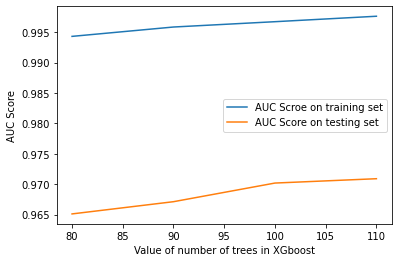

In [40]:
from xgboost import XGBClassifier

tree_range = range(80, 120, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    y_pred_prob = xgb.predict_proba(X_train)[:, 1]
    score1.append(roc_auc_score(y_train, y_pred_prob))
    y_pred_prob1 = xgb.predict_proba(X_test)[:, 1]
    score2.append(roc_auc_score(y_test, y_pred_prob1))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'AUC Scroe on training set')
plt.plot(tree_range,score2,label= 'AUC Score on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('AUC Score')
plt.legend()

Curve Flattens around 100 hence selecting trees as 100

In [41]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
# predict churn on test data
y_test_pred = xgb.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71071     8]
 [   28    95]]
Sensitivity: 	0.77
Specificity: 	1.0
AUC:    	 0.97


**Best Model**
Random forest with 0.79 Sensitivity and 0.97 AUC Score

## SMOTE Oversampling

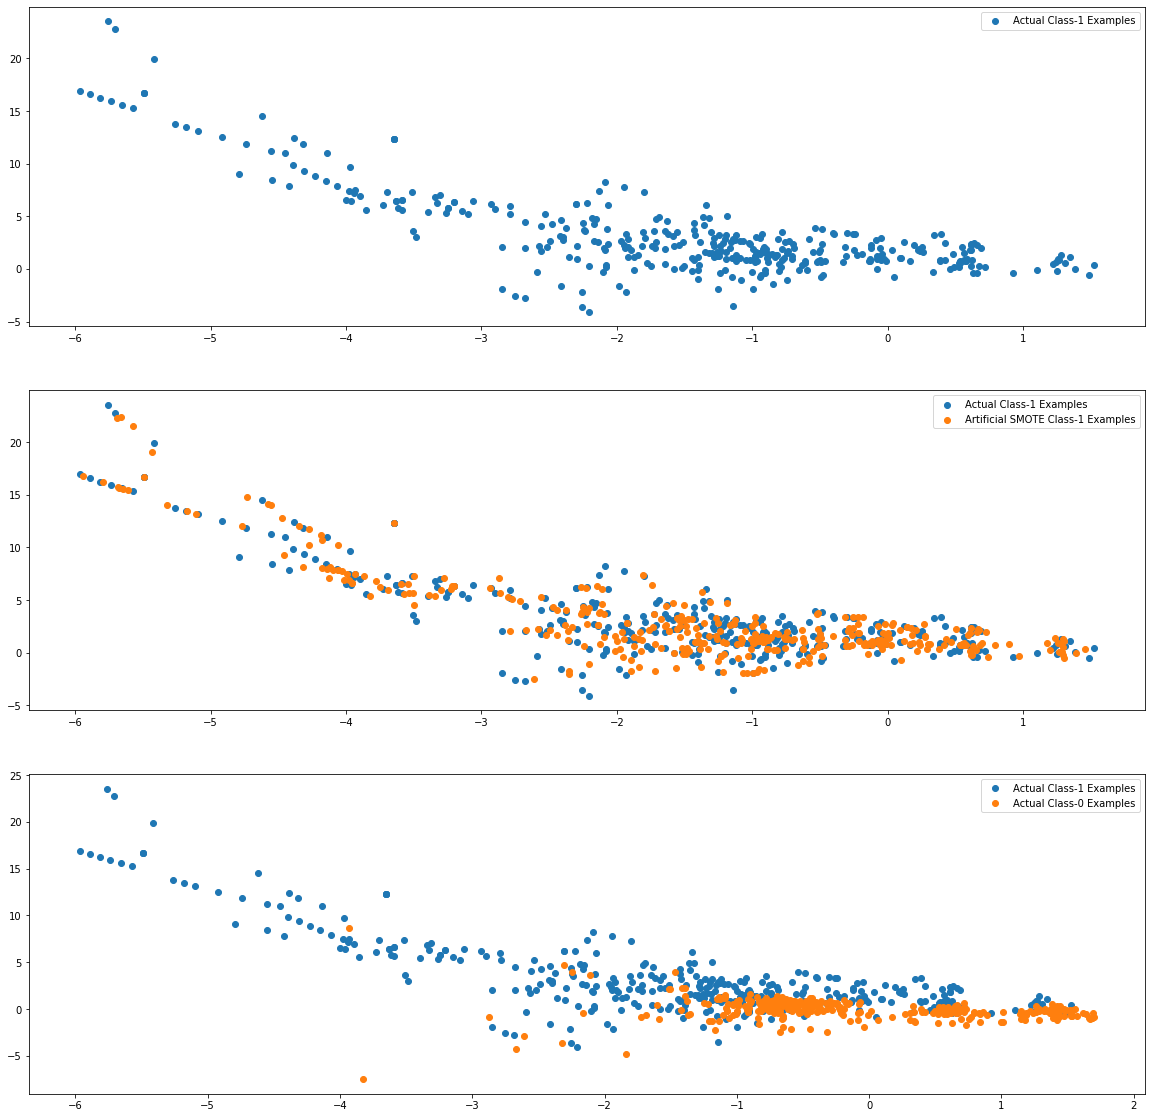

In [42]:
from imblearn import over_sampling

import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [43]:
X_train_smote

array([[-0.68770154, -0.41090603,  1.34085347, ...,  0.17137007,
         0.58379908,  0.94720907],
       [-1.68922228, -0.6015524 , -0.45119294, ..., -2.09091114,
         0.51003094,  1.07758528],
       [-1.14935149,  1.08167516, -0.50605628, ...,  1.36981164,
         0.58253138,  1.04490854],
       ...,
       [-0.9330235 ,  1.40402109, -1.55118066, ...,  0.96394291,
         0.62928731,  1.35252867],
       [-1.41312066,  1.03505805, -1.75746032, ...,  3.83532094,
        -0.88608536,  2.10351161],
       [-0.97843741,  1.21675307, -0.73504096, ...,  1.32253864,
         0.72620181,  1.11810729]])

In [44]:
X_train_smote = pd.DataFrame(data=X_train_smote,columns=cols)
X_train_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.687702,-0.410906,1.340853,-0.535376,-0.158568,0.047998,0.046655,0.194627,0.519610,-0.844992,0.365821,1.253679,0.093466,-0.605382,-1.798904,0.328792,-0.677411,0.091354,0.302364,0.307821,0.084485,-0.003745,0.566883,0.007716,-1.615275,1.317653,0.171370,0.583799,0.947209
1,-1.689222,-0.601552,-0.451193,-1.909394,-0.305639,0.023485,0.100674,0.514401,0.889301,-1.047354,0.025000,0.452034,-0.349679,0.286859,-0.256908,1.823284,-1.448387,1.037600,-0.550023,-2.009915,0.054733,0.857166,-0.078661,0.440860,0.277125,0.824740,-2.090911,0.510031,1.077585
2,-1.149351,1.081675,-0.506056,-1.148611,1.444199,-0.217205,-0.888387,-3.091323,0.685837,-1.409289,-1.656431,0.340880,0.330040,-1.578367,-1.255450,0.745791,0.686069,0.132242,-1.152599,-1.729068,4.437504,-2.826511,-3.449780,-1.665558,-0.479489,-0.436747,1.369812,0.582531,1.044909
3,0.791358,-0.358179,0.342831,-0.099205,-0.731132,-0.550441,-0.482563,-0.339151,0.733062,0.136986,0.455729,-2.117097,2.096262,0.970812,-1.349902,0.579259,1.763422,-1.796201,0.900026,0.062924,-0.207341,-0.192957,-0.070985,0.548574,1.063177,-0.548631,-0.040711,0.038545,-0.029545
4,-0.461845,0.686866,0.862753,0.664698,0.090544,-0.621574,0.602844,-0.175412,-0.415029,0.033079,-0.526362,-0.456287,-0.247631,0.338916,1.184020,-0.438487,-0.247423,0.148182,0.502918,0.182442,0.172998,0.625350,-0.237534,0.602729,-0.415921,-0.623910,1.031131,0.706450,-0.482898


In [45]:
y_train_smote = pd.DataFrame(data=y_train_smote,columns=['Class'])
y_train_smote.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [46]:
y_train_smote.Class.value_counts()

1    213236
0    213236
Name: Class, dtype: int64

SMOTE Oversampled data near every actual class 1 datapoint

## Model Building on SMOTE Oversampled Data

### Logistic Regression

In [47]:
#fitting the linear Regression model
lr_smote = LogisticRegression(random_state = 42)
lr_smote.fit(X_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
#accuracy score of linear regression model
lr_smote.score(X_train_smote,y_train_smote)

0.9526416740137688

In [49]:
# predict churn on test data
y_pred = lr_smote.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr_smote.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[69148  1931]
 [   14   109]]
Sensitivity: 	0.89
Specificity: 	0.97
AUC:    	 0.97


In [0]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_smote = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [51]:
# fit model
model_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [52]:
# cross validation results
pd.DataFrame(model_smote.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092776,0.037800,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,3.584842,0.178232,0.053719,0.004763,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.990813,0.991250,0.991257,0.990929,0.991056,0.991061,0.000175,8
2,0.057379,0.004929,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,3.616212,0.168542,0.051120,0.001126,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.990824,0.991261,0.991268,0.990937,0.991068,0.991072,0.000175,7
4,0.055649,0.001004,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,3.454767,0.214203,0.050907,0.002215,1,l2,"{'C': 1, 'penalty': 'l2'}",0.990825,0.991262,0.991269,0.990938,0.991070,0.991073,0.000175,6
6,0.059537,0.006061,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,3.563242,0.091084,0.052392,0.003276,2,l2,"{'C': 2, 'penalty': 'l2'}",0.990826,0.991263,0.991270,0.990938,0.991071,0.991074,0.000175,5
8,0.065266,0.002501,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,3.506620,0.086127,0.051141,0.001005,3,l2,"{'C': 3, 'penalty': 'l2'}",0.990826,0.991263,0.991270,0.990939,0.991071,0.991074,0.000175,4


In [53]:
# print best hyperparameters
print("Best AUC: ", model_smote.best_score_)
print("Best hyperparameters: ", model_smote.best_params_)

Best AUC:  0.9910742107525289
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [54]:
# predict churn on test data
y_pred = model_smote.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_smote.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[69149  1930]
 [   14   109]]
Sensitivity: 	0.89
Specificity: 	0.97
AUC:    	 0.97


### Random Forest

In [0]:
# random forest
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 'sqrt']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model_smote = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [56]:
# fit model
rf_model_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 77.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              o

In [57]:
# print best hyperparameters
print("Best AUC: ", rf_model_smote.best_score_)
print("Best hyperparameters: ", rf_model_smote.best_params_)

Best AUC:  0.9999993050829781
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'sqrt'}


In [58]:
rf_model_smote.score(X_train_smote,y_train_smote)

1.0

In [59]:
# predict churn on test data
y_test_pred = rf_model_smote.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model_smote.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71065    14]
 [   22   101]]
Sensitivity: 	0.82
Specificity: 	1.0
AUC:    	 0.98


### XGBoost

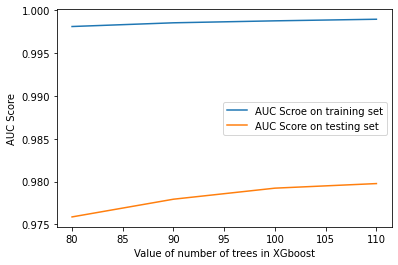

In [60]:
tree_range = range(80, 120, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_smote,y_train_smote)
    y_pred_prob = xgb.predict_proba(X_train_smote)[:, 1]
    score1.append(roc_auc_score(y_train_smote, y_pred_prob))
    y_pred_prob1 = xgb.predict_proba(X_test)[:, 1]
    score2.append(roc_auc_score(y_test, y_pred_prob1))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'AUC Scroe on training set')
plt.plot(tree_range,score2,label= 'AUC Score on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('AUC Score')
plt.legend()

In [61]:
xgb = XGBClassifier(n_estimators=100,random_state=4,)
xgb.fit(X_train_smote, y_train_smote)
# predict churn on test data
y_test_pred = xgb.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[70234   845]
 [   15   108]]
Sensitivity: 	0.88
Specificity: 	0.99
AUC:    	 0.98


XGBoost and Logistic regression have Sensitivity of 0.88 and 0.89 respectively but XGBoost might perform better due to slightly high AUC Score and higher Specificity

## Adasyn Oversampling

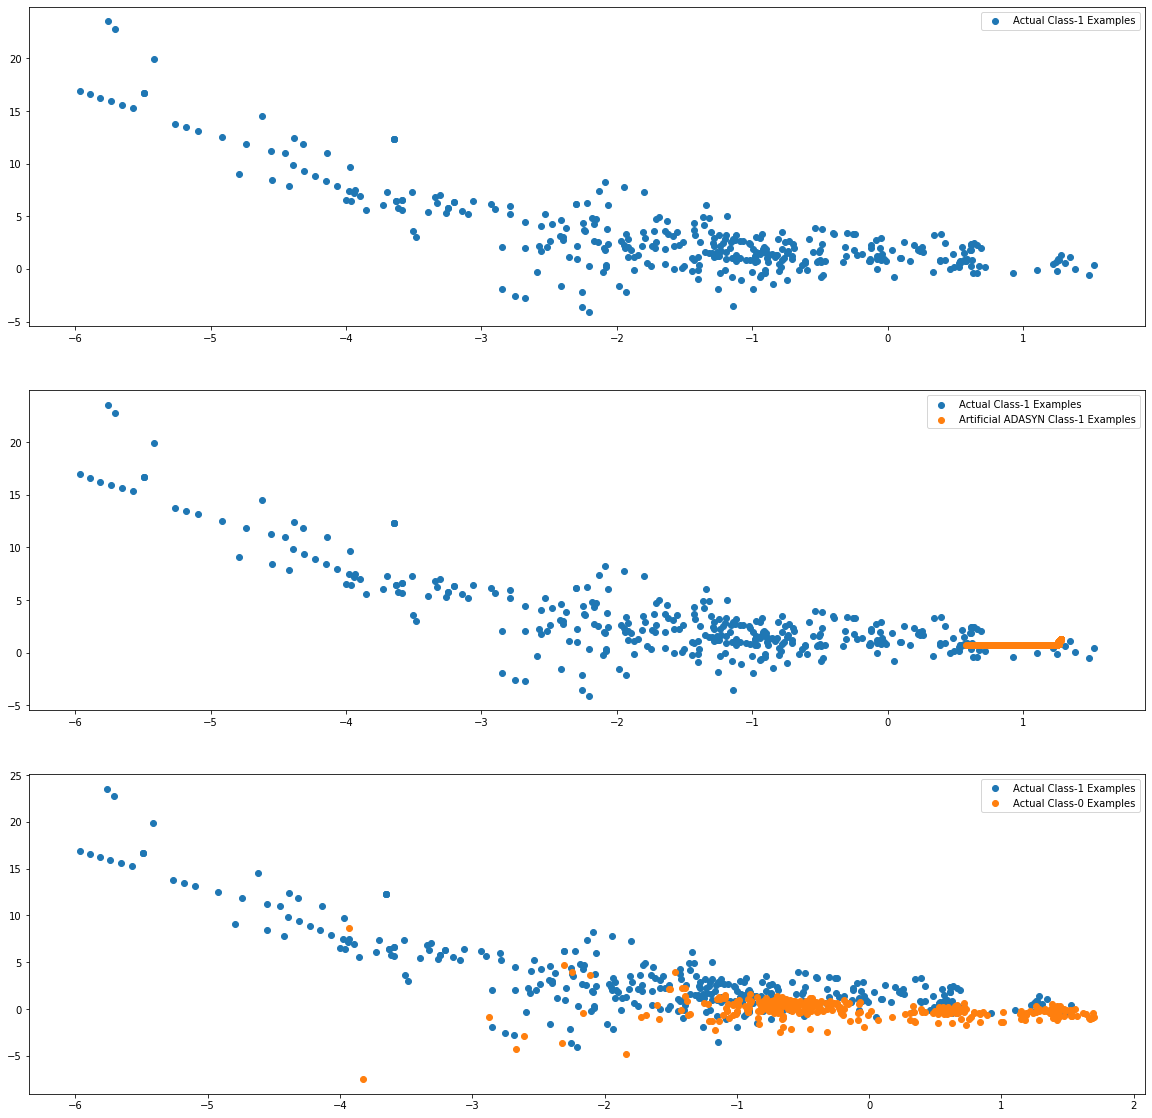

In [62]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [63]:
X_train_adasyn = pd.DataFrame(data=X_train_adasyn,columns=cols)
X_train_adasyn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.687702,-0.410906,1.340853,-0.535376,-0.158568,0.047998,0.046655,0.194627,0.519610,-0.844992,0.365821,1.253679,0.093466,-0.605382,-1.798904,0.328792,-0.677411,0.091354,0.302364,0.307821,0.084485,-0.003745,0.566883,0.007716,-1.615275,1.317653,0.171370,0.583799,0.947209
1,-1.689222,-0.601552,-0.451193,-1.909394,-0.305639,0.023485,0.100674,0.514401,0.889301,-1.047354,0.025000,0.452034,-0.349679,0.286859,-0.256908,1.823284,-1.448387,1.037600,-0.550023,-2.009915,0.054733,0.857166,-0.078661,0.440860,0.277125,0.824740,-2.090911,0.510031,1.077585
2,-1.149351,1.081675,-0.506056,-1.148611,1.444199,-0.217205,-0.888387,-3.091323,0.685837,-1.409289,-1.656431,0.340880,0.330040,-1.578367,-1.255450,0.745791,0.686069,0.132242,-1.152599,-1.729068,4.437504,-2.826511,-3.449780,-1.665558,-0.479489,-0.436747,1.369812,0.582531,1.044909
3,0.791358,-0.358179,0.342831,-0.099205,-0.731132,-0.550441,-0.482563,-0.339151,0.733062,0.136986,0.455729,-2.117097,2.096262,0.970812,-1.349902,0.579259,1.763422,-1.796201,0.900026,0.062924,-0.207341,-0.192957,-0.070985,0.548574,1.063177,-0.548631,-0.040711,0.038545,-0.029545
4,-0.461845,0.686866,0.862753,0.664698,0.090544,-0.621574,0.602844,-0.175412,-0.415029,0.033079,-0.526362,-0.456287,-0.247631,0.338916,1.184020,-0.438487,-0.247423,0.148182,0.502918,0.182442,0.172998,0.625350,-0.237534,0.602729,-0.415921,-0.623910,1.031131,0.706450,-0.482898


In [64]:
y_train_adasyn = pd.DataFrame(data=y_train_adasyn,columns=['Class'])
y_train_adasyn.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [65]:
y_train_adasyn.Class.value_counts()

1    213245
0    213236
Name: Class, dtype: int64

ADASYN oversampled data around a specific region where there was low density of class 1

## Model Building on ADASYN oversampled Data

### Logistic Regression

In [66]:
#fitting the linear Regression model
lr_adasyn = LogisticRegression(random_state = 42)
lr_adasyn.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
#accuracy score of linear regression model
lr_adasyn.score(X_train_adasyn,y_train_adasyn)

0.9051329367545096

In [68]:
# predict churn on test data
y_pred = lr_adasyn.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr_adasyn.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[65153  5926]
 [   11   112]]
Sensitivity: 	0.91
Specificity: 	0.92
AUC:    	 0.97


In [0]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model_adasyn = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [70]:
# fit model
model_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [71]:
# cross validation results
pd.DataFrame(model_adasyn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086138,0.029157,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,3.432916,0.246567,0.050836,0.001012,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.968795,0.968235,0.968597,0.969306,0.968084,0.968603,0.000433,8
2,0.056348,0.004646,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,3.466463,0.159100,0.049985,0.001504,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.968807,0.968251,0.968615,0.969319,0.968095,0.968618,0.000432,7
4,0.061500,0.002907,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,3.542349,0.067572,0.050560,0.001217,1,l2,"{'C': 1, 'penalty': 'l2'}",0.968809,0.968253,0.968618,0.969321,0.968096,0.968619,0.000433,6
6,0.060415,0.006047,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,3.484901,0.109378,0.050611,0.000651,2,l2,"{'C': 2, 'penalty': 'l2'}",0.968810,0.968254,0.968619,0.969322,0.968097,0.968620,0.000433,5
8,0.057422,0.002595,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,3.470574,0.121279,0.049579,0.000792,3,l2,"{'C': 3, 'penalty': 'l2'}",0.968810,0.968254,0.968620,0.969322,0.968097,0.968620,0.000433,4


In [72]:
# print best hyperparameters
print("Best AUC: ", model_adasyn.best_score_)
print("Best hyperparameters: ", model_adasyn.best_params_)

Best AUC:  0.9686209081330508
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [73]:
# predict churn on test data
y_pred = model_adasyn.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_adasyn.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[65154  5925]
 [   11   112]]
Sensitivity: 	0.91
Specificity: 	0.92
AUC:    	 0.97


In [74]:
# accuracy score with turen parameters
model_adasyn.score(X_test,y_test)

0.9748275049964445

### Random Forest

In [0]:
# random forest
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 'sqrt']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model_adasyn = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [76]:
# fit model
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 86.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              o

In [77]:
# print best hyperparameters
print("Best AUC: ", rf_model_adasyn.best_score_)
print("Best hyperparameters: ", rf_model_adasyn.best_params_)

Best AUC:  0.9999998386345649
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'sqrt'}


In [78]:
# accuracy score with turen parameters
rf_model_adasyn.score(X_test,y_test)

0.9784047682202226

In [0]:
rf_model_adasyn = RandomForestClassifier(n_jobs = -1, criterion='entropy', max_features='auto')

In [80]:
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [81]:
# predict churn on test data
y_test_pred = rf_model_adasyn.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model_adasyn.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71068    11]
 [   26    97]]
Sensitivity: 	0.79
Specificity: 	1.0
AUC:    	 0.97


### XGBoost

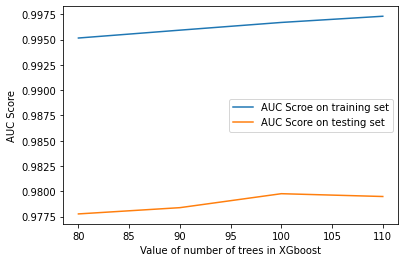

In [82]:
tree_range = range(80, 120, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_adasyn,y_train_adasyn)
    y_pred_prob = xgb.predict_proba(X_train_adasyn)[:, 1]
    score1.append(roc_auc_score(y_train_adasyn, y_pred_prob))
    y_pred_prob1 = xgb.predict_proba(X_test)[:, 1]
    score2.append(roc_auc_score(y_test, y_pred_prob1))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'AUC Scroe on training set')
plt.plot(tree_range,score2,label= 'AUC Score on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('AUC Score')
plt.legend()

In [83]:
xgb = XGBClassifier(n_estimators=100,random_state=4)
xgb.fit(X_train_adasyn, y_train_adasyn)
# predict churn on test data
y_test_pred = xgb.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[68670  2409]
 [   12   111]]
Sensitivity: 	0.9
Specificity: 	0.97
AUC:    	 0.98


XGBoost and Logistic Regression have sensitivity of 0.9 and 0.91 resectively but XGBoost is reffered since it has a better performance in terms of specificity and AUC Score.

## Feature Interpretation (not valid for this data as data consists of principal components)

Top var = 14
2nd Top var = 4
3rd Top var = 8


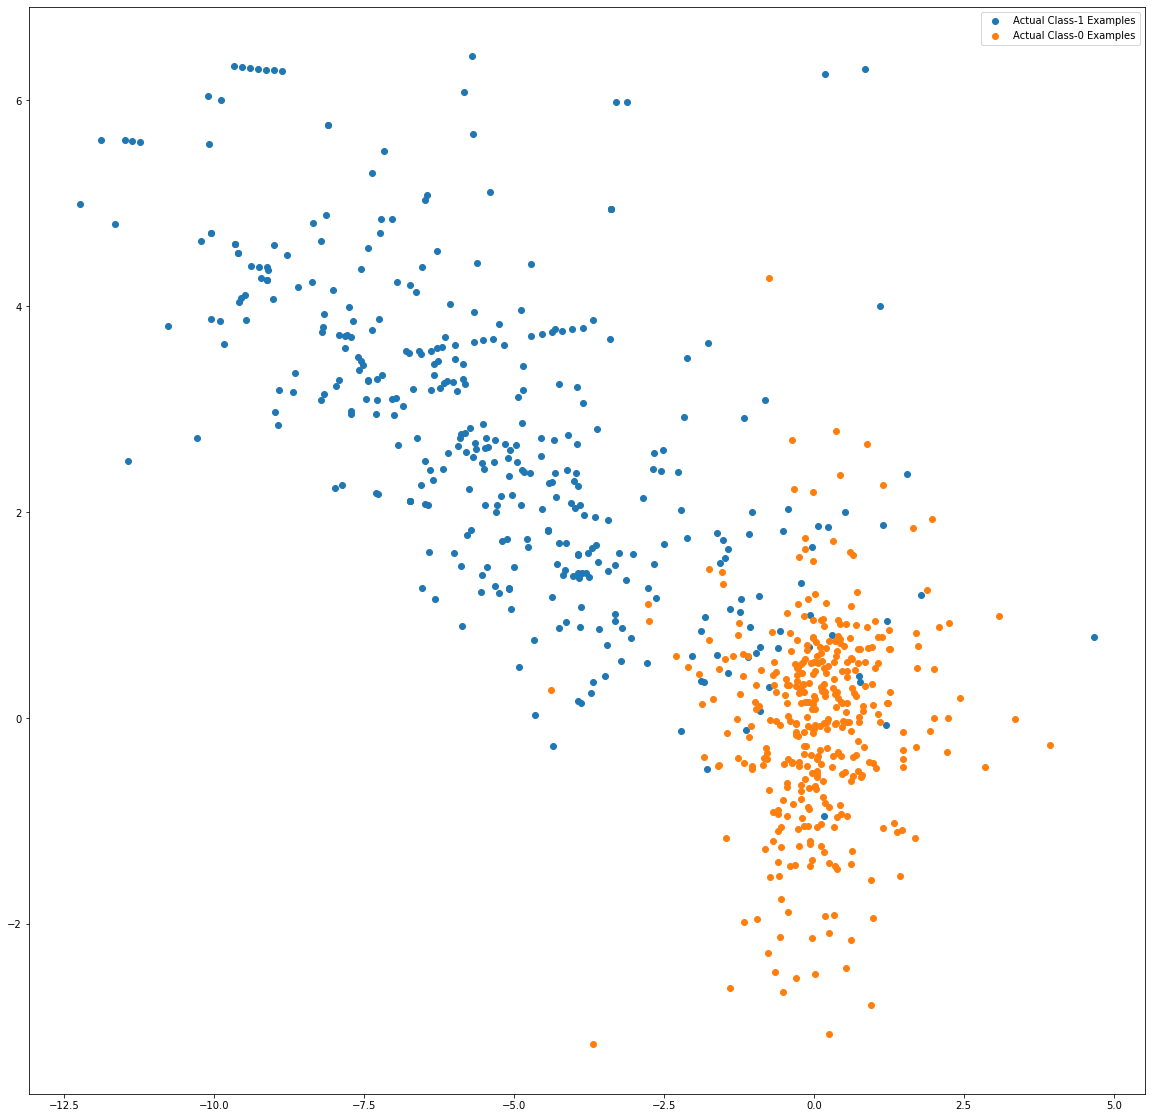

In [84]:
var_imp = []
for i in xgb.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Best Model

In [85]:
from sklearn import metrics
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, xgb.predict_proba(X_train_adasyn)[:, 1]))
print('Test auc =', metrics.roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold = ',threshold)

Train auc = 0.9966881841666505
Test auc = 0.9797571510092342
Best Threshold =  0.6038552


## **Conclusion**
XGBoost on the ADASYN oversampled data gives the best model in terms of predicting the fraud transactions with a minimum error.